In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt

from vapeplot import vapeplot

torch.manual_seed(42)

In [2]:
dataset = torchvision.datasets.MNIST("../datasets", train=True, transform=torchvision.transforms.ToTensor())
loader = torch.utils.data.DataLoader(dataset)
data_iter = enumerate(loader)

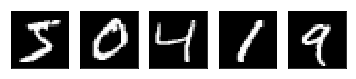

In [3]:
for i in range(5):
    _, data = next(data_iter)
    tens, _ = data
    tens = tens.view(tens.shape[1:])
    img = (tens.numpy() * 255).astype(int)
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[0, ...], cmap='gray')
plt.savefig('mnist_samples', bbox_inches='tight')

In [4]:
plt.style.use('fivethirtyeight')

In [5]:
xx = torch.linspace(-10, 10, 2000)
relu_out = F.relu(xx)
elu_out = F.elu(xx)
leaky_out = F.leaky_relu(xx, negative_slope=.2)
selu_out = F.selu(xx)
sig_out = F.sigmoid(xx)

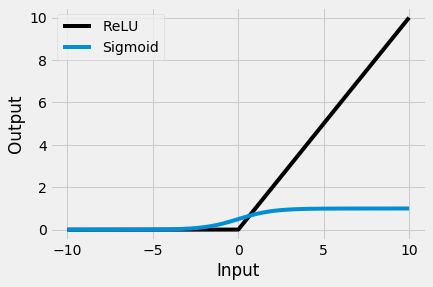

In [6]:
plt.plot(xx.numpy(), relu_out.numpy(), label='ReLU', c='k')
plt.plot(xx.numpy(), sig_out.numpy(), label='Sigmoid')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.savefig('relu', bbox_inches='tight')

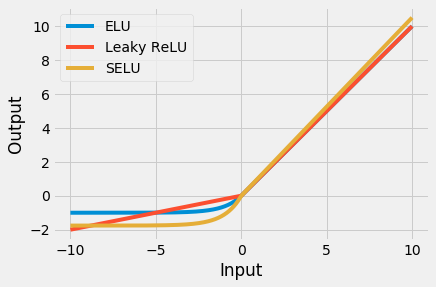

In [7]:
plt.plot(xx.numpy(), elu_out.numpy(), label='ELU')
plt.plot(xx.numpy(), leaky_out.numpy(), label='Leaky ReLU')
plt.plot(xx.numpy(), selu_out.numpy(), label='SELU')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.savefig('relu_generalizations', bbox_inches='tight')

In [8]:
def squash(tensor):
    """
    Squash function, defined in [1]. Works as a non-linearity for CapsNets.
    Input tensor will be of format (bs, units, C, H, W) or (bs, units, C)
    Norm should be computed on the axis representing the number of units.

    Parameters
    ----------
        tensor :    torch Variable containing n-dimensional tensor

    Returns
    -------
        (||tensor||^2 / (1+ ||tensor||^2)) * tensor/||tensor||
    """
    norm = torch.norm(tensor, p=2, dim=1, keepdim=True)
    sq_norm = norm ** 2  # Avoid computing square twice

    return tensor.div(norm) * sq_norm / (1 + sq_norm)

In [23]:
vec = torch.randn((1, 2))
squashed_vec = squash(vec)
plt.style.use('fivethirtyeight')
vapeplot.set_palette('vaporwave')

D:\Programs\Anaconda3\envs\torch\lib\site-packages\matplotlib\quiver.py:624: RuntimeWarning: invalid value encountered in true_divide
  lengths = np.hypot(*dxy.T) / eps


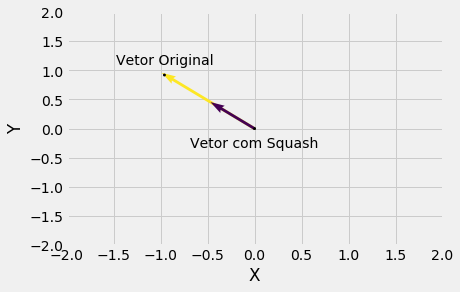

In [29]:
Q = plt.quiver([0, 0], [0, 0], [vec[0][0], squashed_vec[0][0]], [vec[0][1], squashed_vec[0][1]], np.hypot(vec, squashed_vec), angles='xy', scale_units='xy', scale=1)
qk1 = plt.quiverkey(Q, .5, .5, 1, "Vetor com Squash", labelpos='S')
qk2 = plt.quiverkey(Q, .26, .73, 1, "Vetor Original", labelpos='N')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig('squash_quiver', bbox_inches='tight')